<div align="center"> <h1> <span style="color:green">  Deep Learning model to Monitor  </span>   <span style="color:red">  Handwritten Numbers  </span>  </h1>  
Jayakumar. S PhD, </br>
www.jkuse.com
</div>

It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it. 
Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte.gz
Saving t10k-images-idx3-ubyte.gz to t10k-images-idx3-ubyte.gz
Saving t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte.gz
Saving train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte.gz


In [3]:


files = [
    'train-labels-idx1-ubyte.gz', 
    'train-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz', 
    't10k-images-idx3-ubyte.gz'
]

In [6]:
from tensorflow.python.keras.utils.data_utils import get_file

In [9]:
print(files[0])

train-labels-idx1-ubyte.gz


In [13]:
import gzip
import os
import numpy as np

In [15]:
with gzip.open(files[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

with gzip.open(files[1], 'rb') as imgpath:
    x_train = np.frombuffer(
    imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
with gzip.open(files[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)
    
with gzip.open(files[3], 'rb') as imgpath:
    x_test = np.frombuffer(
    imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

In [16]:
train_images = x_train
train_labels = y_train
print(train_images.shape)
print(train_labels.shape)
trainX = x_train
trainy = y_train

(60000, 28, 28)
(60000,)


In [17]:
test_images = x_test 
test_labels = y_test
print(test_images.shape)
print(test_labels.shape)
testX = x_test 
testy =  y_test

(10000, 28, 28)
(10000,)


In [18]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [19]:
print(trainX.shape[0])
print(testX.shape[0])
trainX1 = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX1 = testX.reshape((testX.shape[0], 28, 28, 1)) 
print('Afer Reshape input array image in to tensor')
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

60000
10000
Afer Reshape input array image in to tensor
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [21]:
from matplotlib import pyplot

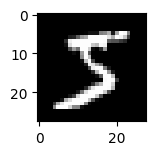

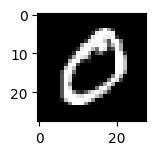

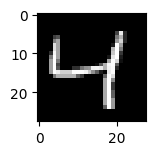

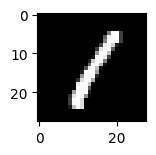

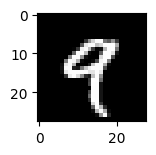

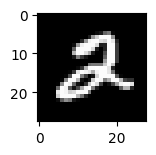

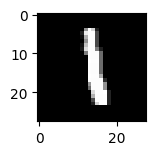

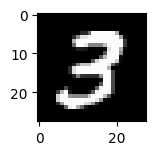

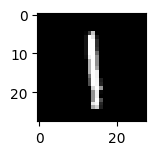

In [22]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [23]:
train_norm = trainX1.astype('float32')
test_norm = testX1.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images

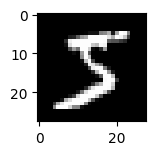

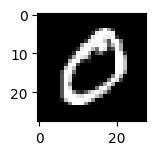

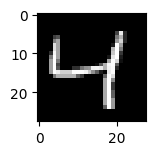

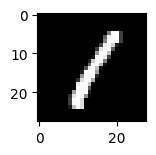

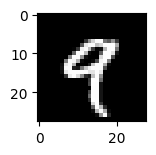

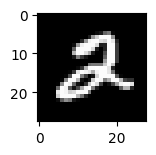

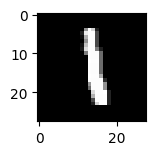

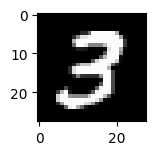

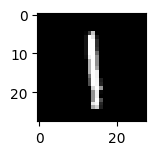

In [24]:
trainX1a = trainX.reshape((train_norm.shape[0], 28, 28))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX1a[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [26]:
from tensorflow.python.util.tf_export import tf_export
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import mean

In [27]:
print(trainy.shape)
trainY = to_categorical(trainy)
testY = to_categorical(testy)



(60000,)


In [28]:
print(trainY.shape)
print(testY.shape)

(60000, 10)
(10000, 10)


In [29]:
for i in range(10):
    print(trainY[58888][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [31]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [32]:
scores, histories = list(), list()
history = model.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1614 - accuracy: 0.9504 - val_loss: 0.0747 - val_accuracy: 0.9754
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0420 - val_accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0237 - accuracy: 0.9931 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0403 - val_accuracy: 0.9866


In [33]:
_, acc = model.evaluate(test_norm, testY, verbose=1)
print('> %.3f' % (acc * 100.0))
# stores scores
scores.append(acc)
histories.append(history)
print(history)

313/313 [==============================] - 2s 8ms/step - loss: 0.0403 - accuracy: 0.9866
> 98.660


In [34]:
print(histories[0].history)
print(histories[0].history)

{'loss': [0.16140249371528625, 0.05354499816894531, 0.035356730222702026, 0.023740725591778755, 0.016112493351101875], 'accuracy': [0.9503833055496216, 0.9842666387557983, 0.9892333149909973, 0.9930999875068665, 0.9951833486557007], 'val_loss': [0.0747467502951622, 0.053847771137952805, 0.04203291982412338, 0.03912528604269028, 0.04034474492073059], 'val_accuracy': [0.9753999710083008, 0.9829999804496765, 0.9851999878883362, 0.9872999787330627, 0.9865999817848206]}
{'loss': [0.16140249371528625, 0.05354499816894531, 0.035356730222702026, 0.023740725591778755, 0.016112493351101875], 'accuracy': [0.9503833055496216, 0.9842666387557983, 0.9892333149909973, 0.9930999875068665, 0.9951833486557007], 'val_loss': [0.0747467502951622, 0.053847771137952805, 0.04203291982412338, 0.03912528604269028, 0.04034474492073059], 'val_accuracy': [0.9753999710083008, 0.9829999804496765, 0.9851999878883362, 0.9872999787330627, 0.9865999817848206]}


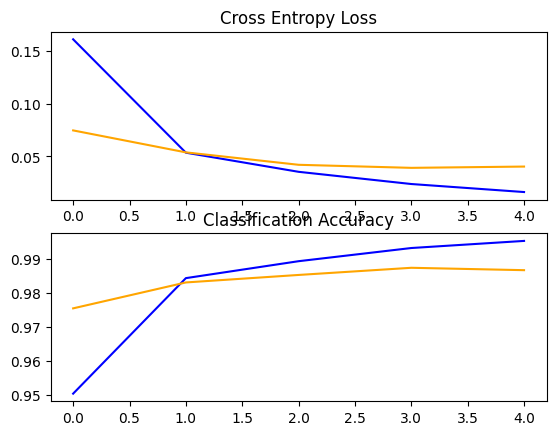

In [35]:
for i in range(len(histories)):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    #pyplot.plot(histories[i].history['acc'], color='blue', label='train')
    #pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()

Accuracy: mean=98.660 std=0.000, n=1


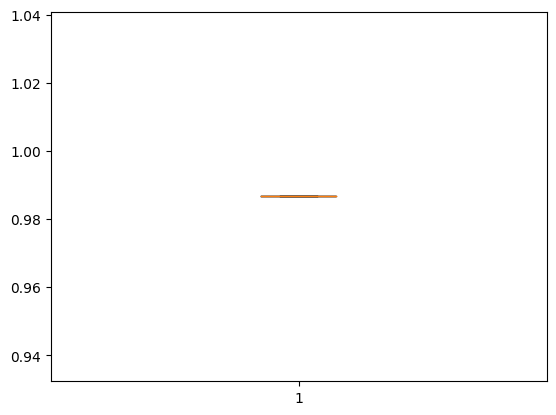

In [36]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()